# Test-Analyse-Notebook

Dieses Notebook zeigt einfache Auswertungen und Plots für den Quarto-Workflow.

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
dates = pd.date_range("2025-01-01", periods=30, freq="D")
values = np.cumsum(rng.normal(loc=0.0, scale=1.0, size=len(dates))) + 10

df = pd.DataFrame({"date": dates, "value": values})
df["category"] = rng.choice(["A", "B", "C"], size=len(df), replace=True)
df["metric"] = rng.normal(50, 10, size=len(df)).round(2)

df.head()


,date,value,category,metric
0,2025-01-01,10.304717,C,52.32
1,2025-01-02,9.264733,C,51.17
2,2025-01-03,10.015184,B,52.19
3,2025-01-04,10.955749,C,58.71
4,2025-01-05,9.004714,B,52.24


## Liniendiagramm über die Zeit

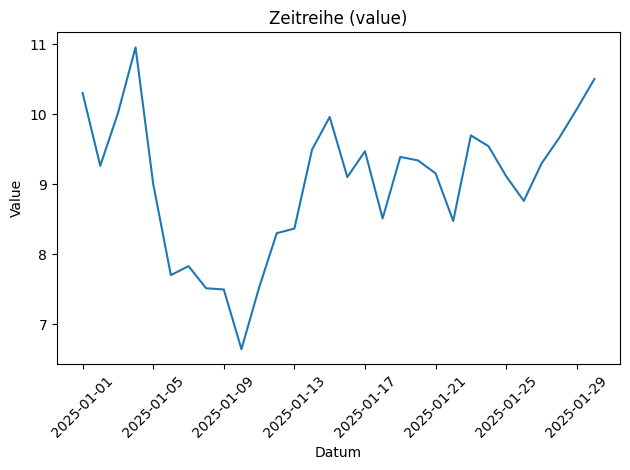

In [8]:

import matplotlib.pyplot as plt

plt.figure()
plt.plot(df["date"], df["value"])
plt.title("Zeitreihe (value)")
plt.xlabel("Datum")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()


## Balkendiagramm (Mittelwerte je Kategorie)

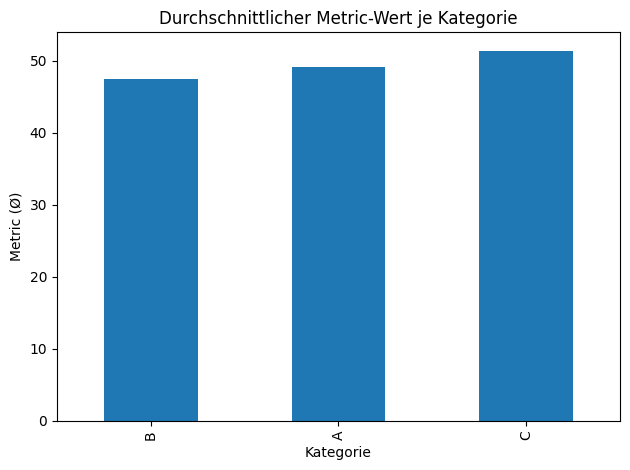

In [9]:

means = df.groupby("category")["metric"].mean().sort_values()
plt.figure()
means.plot(kind="bar")
plt.title("Durchschnittlicher Metric-Wert je Kategorie")
plt.xlabel("Kategorie")
plt.ylabel("Metric (Ø)")
plt.tight_layout()


## Histogramm der Metrik

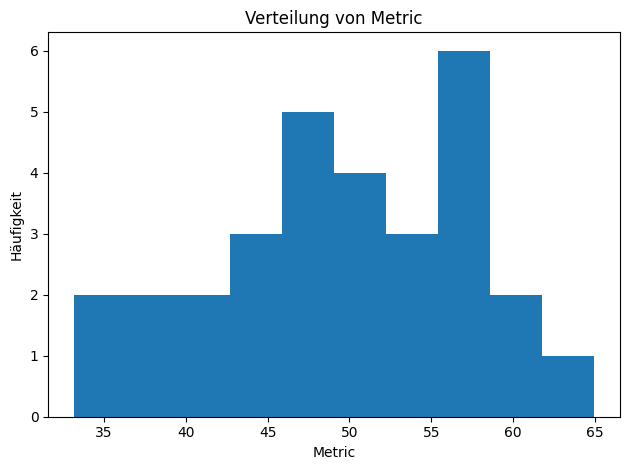

In [10]:

plt.figure()
plt.hist(df["metric"], bins=10)
plt.title("Verteilung von Metric")
plt.xlabel("Metric")
plt.ylabel("Häufigkeit")
plt.tight_layout()


## Snapshot-Funktion

Mit der folgenden Funktion können Sie manuell eine versionierte Kopie des Notebooks in `notebooks/versions/` speichern. Führen Sie die Zelle aus, **nachdem** Sie das Notebook gespeichert haben.

In [12]:

import os, shutil, datetime, json

def save_snapshot(src_path="notebooks/test_analysis.ipynb", outdir="notebooks/versions", message="Snapshot aus Notebook"):
    os.makedirs(outdir, exist_ok=True)
    if not os.path.exists(src_path):
        print("Quelle nicht gefunden:", src_path)
        return
    ts = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    base = os.path.splitext(os.path.basename(src_path))[0]
    dst = os.path.join(outdir, f"{base}_{ts}.ipynb")
    shutil.copyfile(src_path, dst)
    meta = {"timestamp": ts, "message": message}
    with open(dst + ".meta.json", "w", encoding="utf-8") as f:
        json.dump(meta, f, ensure_ascii=False, indent=2)
    print("Snapshot gespeichert:", dst)

print("Aufruf: save_snapshot()")


Aufruf: save_snapshot()
